In [1]:
import sys
sys.path.append('/lmh_data/work/SEE/analyse/')

import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from analyse_util import figure_size, set_plt, set_Border

In [2]:
eval_set = np.load('/lmh_data/data/sclab/sclab/eval_dataset.npy', allow_pickle=True)

preds = np.load('/lmh_data/data/sclab/sclab/tmp/PDGFRA/evaluate.npy', allow_pickle=True)
preds_old = np.load('/lmh_data/data/sclab/sclab/tmp/PDGFRA_old/evaluate.npy', allow_pickle=True)

In [3]:
def get_df(preds):
    data = pd.DataFrame()
    for i in range(len(eval_set)):
        if eval_set[i]['cell_type'] == 'Endo':
            continue
        _pearson = stats.pearsonr(preds[i]['predict'], preds[i]['target'])[0]
        _data = pd.DataFrame({'pearson': [_pearson], 'cell_type': [eval_set[i]['cell_type']]})
        data = pd.concat([data, _data], axis=0, ignore_index=True)
#         data.append(_data, ignore_index=True)
    return data

preds_info, preds_old_info = get_df(preds), get_df(preds_old)
preds_info['loss'] = 'Control'
preds_old_info['loss'] = 'MSE'
data = pd.concat([preds_info, preds_old_info], axis=0, ignore_index=True)
data

,pearson,cell_type,loss
0,0.911136,ODC,Control
1,0.886920,OPC,Control
2,0.992076,OPC,Control
3,0.774242,ODC,Control
4,0.951122,ODC,Control
...,...,...,...
681,0.625152,Astro,MSE
682,0.816966,ODC,MSE
683,0.755370,Astro,MSE
684,0.912553,ODC,MSE


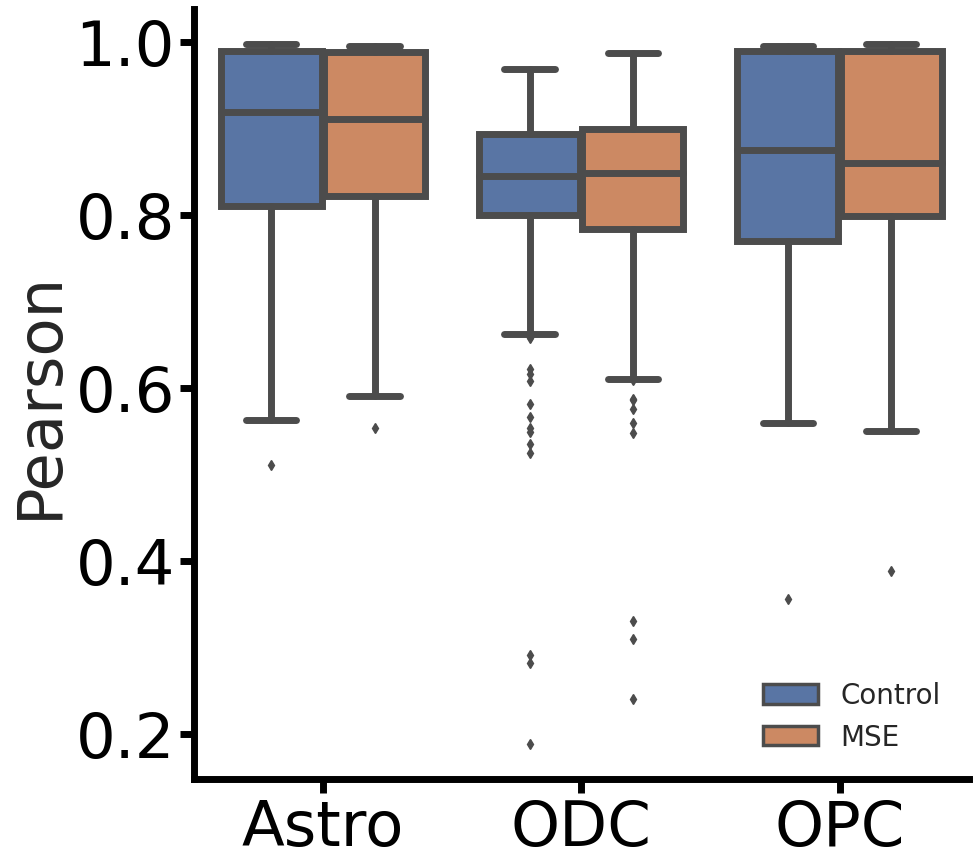

In [4]:
set_plt(figsize=(10, 10))
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots()

ax = sns.boxplot(x='cell_type', y='pearson', data=data, hue='loss',
                 order=['Astro', 'ODC', 'OPC'], linewidth=figure_size['very_small'])

set_Border(plt.gca())
plt.tick_params(colors='black', bottom=True, left=True, labelsize=figure_size['ultra'])
plt.legend(
    frameon=False, markerscale=2, borderpad=1, borderaxespad=0, fontsize=figure_size['middle'], loc='lower right')
plt.grid(False)

plt.xlabel("")
plt.ylabel("Pearson", fontsize=figure_size['ultra'])

plt.savefig('/lmh_data/work/SEE/analyse/figure_file/pearsonr analysis.pdf', format='pdf', bbox_inches='tight')
plt.show()